<a href="https://colab.research.google.com/github/sunnyyao/MachineLearning/blob/main/train_validation_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
np.random.seed(42)

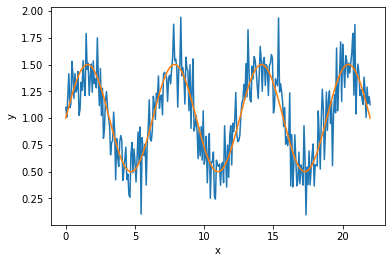

In [7]:
 

import numpy as np
N = 300
x = np.linspace(0,7*np.pi,N)

smooth = 1 + 0.5*np.sin(x)
y = smooth+ 0.2*np.random.randn(N)
plt.plot(x,y)
plt.plot(x,smooth)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [8]:
#Create two models:Polynominal and linear regression
X = x.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle = False)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression(fit_intercept=False))
linreg=LinearRegression()
#Cross-Validation
scoring ="neg_root_mean_squared_error"
polyscores = cross_validate(polyreg,X_train,y_train,scoring =scoring,return_estimator =True)

linscores = cross_validate(linreg,X_train,y_train,scoring = scoring, return_estimator = True)
#Which one is better? Linear and polydomial
print("Linear regression score:",linscores["test_score"].mean())
print("Polynomial regression score:",polyscores["test_score"].mean())

print("Coefficients of polynomial regression and linear regression:")
#Let's show the coefficeint of the last fitted polynomial regression
#This starts from the constant term and in ascending order of powers
print(polyscores["estimator"][0].steps[1][1].coef_)
#And show the coefficient of the last_fitter linear regression
print(linscores["estimator"][0].intercept_,linscores["estimator"][-1].coef_)








Linear regression score: -0.4459827970437929
Polynomial regression score: -0.6228780695994603
Coefficients of polynomial regression and linear regression:
[-0.03190358  0.20818594 -0.00937904]
0.856999187854241 [-0.00918622]


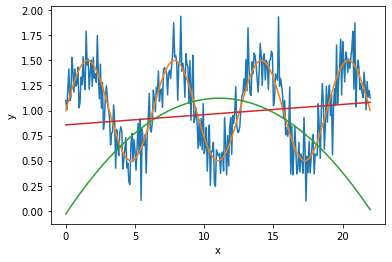

In [9]:
#plot and compare
plt.plot(x,y)
plt.plot(x,smooth)
plt.plot(x,polyscores["estimator"][0].predict(X))
plt.plot(x,linscores["estimator"][0].predict(X))

plt.xlabel("x")
plt.ylabel("y")

plt.show()



In [11]:
#Retrain the model and evauate
import sklearn
linreg =sklearn.base.clone(linreg)
linreg.fit(X_train,y_train)
print("Test set RMSE:", mean_squared_error(y_test,linreg.predict(X_test),squared=False))
print("Mean validation RMSE:",-linscores["test_score"].mean())



Test set RMSE: 0.4403109417232645
Mean validation RMSE: 0.4459827970437929
